# **Implement a Quicksort Algorithm**
MSDS 432 Module 4

Nameyeh Alam

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import string
import warnings
warnings.filterwarnings("ignore", category=Warning)
import time

### 1. Set up five lists of randomly generated strings of length 50 characters, each with a length of 200, 400, 600, 800, 1000.
In this section, we created our 5 lists, and then created a list of lists to hold our five arrays. In the next section, we'll be able to apply our sorting algorithms to the list of lists, instead of individually to all five lists. We also verified that the lists were unsorted and did not contain duplicates.

In [2]:
random.seed(5)
array1 = [''.join(random.choices(string.ascii_letters, k = 50)) for _ in range(200)]
random.seed(6)
array2 = [''.join(random.choices(string.ascii_letters, k = 50)) for _ in range(400)]
random.seed(7)
array3 = [''.join(random.choices(string.ascii_letters, k = 50)) for _ in range(600)]
random.seed(8)
array4 = [''.join(random.choices(string.ascii_letters, k = 50)) for _ in range(800)]
random.seed(9)
array5 = [''.join(random.choices(string.ascii_letters, k = 50)) for _ in range(1000)]

In [3]:
# verify that lists are unsorted
array_list = [array1,array2,array3,array4,array5]
print(str(array_list[0][0:4])+"\n\n"+
      str(array_list[1][0:4])+"\n\n"+
      str(array_list[2][0:4])+"\n\n"+
      str(array_list[3][0:4])+"\n\n"+
      str(array_list[4][0:4]))

['GMPXMVbyXHUfymCDaloVNiPhGgaTklZTpXCJkWJYUpsihdpFaJ', 'rqQyqzKcYbMRaOtEacjXkNWWrsBOfMPSbXerFVrWCqqjehJZic', 'ZBvmEQxvcVbzRgMXGOfwhRpxZSYxzLypuhtZXGzreoOTsOOKIN', 'sKozOJpXHEaCnIyQHPsHMRsRTJYXABiRWyJLLiOEIvGOHLbiwH']

['PQznaIyNtOoPLvBJkCPnPJRrePPxekHpXEkIsWVAHKPYbsFpEe', 'TBgIqkzhkTKaOarVGptugZcvMuZmYUIUxRPAyKveMnzOibgEsn', 'xWnvTFnyyhtpPqIYWtFquzPWpaxcbOfLsWSdkXFvOQzyfshGFh', 'GffHyUGKgReGVVUxKPhXVwOxoLdPYoWeSoYwVbeQHBbjtcZNXK']

['qhHdBtdAbwdewQglGXEuYcSphgqQjEHtCddkJwqExpPKmDBTLo', 'YgvNhzcINDTqKEExRXyIdKHZQouIbyigdNgmuTexCTQSovsTXh', 'jmmzEnavtDXJAGJcUOTPuufGddkircahfsbTFhnssgSZyzefrn', 'RibXBhCbBYSKntiOBOrlQZSPQMlAsbbonKXxWZXsllkkGURyHP']

['lYgKemZkHxxzjRembnvUtfnZdGtIrJzHUEhdXzkXELTosThNfJ', 'KXRAkhBAdUAKlmarnwtRUjuiIYkNpaNriwmvxvEpeefBsQAKYd', 'ahuDMsYaRkTbYNZEjYweFzyigExgwLLyuslkxfLKFbsweYNAKk', 'lBMHaFVMWZlpCYtWSAGXOpRktXSqpFRJWLQFswzBRndMovgRop']

['ythTaAUeCGctKxLimfAWEOtMfpJLvenkoQkUTctzbwVfFgEUka', 'eCaezVvuHeEiFXcCFhnZZgKXmFctJEOesSExuZDaPrwlxqeGfO', 'bOPzKmMwmYutStIiRn

In [4]:
array_sizes_list = [len(x) for x in array_list]
array_sizes_list

[200, 400, 600, 800, 1000]

In [5]:
# check for duplicates 
from collections import Counter
for x in array_list: 
    print([k for k,v in Counter(x).items() if v>1])

[]
[]
[]
[]
[]


### 2. Use the textbook implementation of quicksort to sort the data, being sure to capture the amount of time it takes for each list.

In this section, we first defined the quicksort function, as provided in the textbook. We then created empty lists to store the sorted lists and the sort execution time. Lastly, we verified that the sorting was successful by viewing the first three elements in the newly sorted lists by using a list comprehension and list slice. Later, we decided to use a for loop to print the first three elements in the newly sorted lists, for ease of printing when we combined the implementation of the other algorithms into one jupyter cell. 


In [6]:
def quicksort(array):
  if len(array) < 2:
    # base case, 
    # arrays with 0 or 1 element 
    # are already "sorted"
    return array
  else:
    # recursive case
    pivot = array[0]
    # sub-array of all 
    # the elements less than the pivot
    less = [i for i in array[1:] if i <= pivot]
    # sub-array of all 
    # the elements greater than the pivot
    greater = [i for i in array[1:] if i > pivot]
    return quicksort(less) + [pivot] + quicksort(greater)

print(quicksort([10, 5, 2, 3]))

[2, 3, 5, 10]


In [7]:
array_list_sorted = []
array_list_sort_time = []
for n in array_list:
    import time
    start = time.perf_counter()
    y = quicksort(n)
    end = time.perf_counter()
    time = (end - start)*1000 # convert to milliseconds 
    array_list_sorted.append(y)
    array_list_sort_time.append(time)
    
print("IMPLEMENT QUICK SORT")
print("--------------------")
print("QUICK SORT --- SORT TIMES:")
array_list_sort_time

IMPLEMENT QUICK SORT
--------------------
QUICK SORT --- SORT TIMES:


[0.5740610000000146,
 1.1200010000003147,
 2.349093000000302,
 2.187638000000103,
 3.1214560000001335]

In [8]:
# verify sorting
# using list comprehension + list slicing 
# view sublist first 3 elements in each list
[i[0:3] for i in array_list_sorted]  

[['AIrJtGFIWKKKlFGdNlzBLNyWxDZqLXeOHCPShzGKXPRdwVXNrO',
  'AqqvGYLXpbiRfNZOzkRjayVZAcywItvSPnCcAaGuWAiNuCLuBc',
  'AyxHjomwqpXGqfGFDcFPDIstnNMCApYcDqPYELkZxTbrKiaqKS'],
 ['ADdhTNXDUssrfbUmqEPzAPqQmAykSXlLlcMqDrTwpYNLSOTYuK',
  'AVOtwuYDthPdPsbPQCSPvLPVkZJpOZsAxJtgZJsCcXerXTimZm',
  'AXbQMBnWgXCpNUIDvBdVqGLbjOlxvVxbqwVZMUvumeBqYLuvjH'],
 ['ABBawjaPiyLCqACOfDmoOADNVxFAAKxByWKTWnDXRhgwdmdIOU',
  'ACfExrRJgfcnHYYSgPNyZFglgFGSaaYnnTfPUDFaFFOAflHefn',
  'ADBIdksqYSNHQPotOZKXLIeXCvmudKJZFRRJeJmqrDOiKVrjGi'],
 ['AAzBAPUalANGoaAWRwKPWZKRFumgnxOEDgQquIfLHPocYflWfc',
  'AFzCrZeZZFfTsDqwukBOnafKCIFmVuMTCnjklZiWJeXGTOJPrY',
  'AKBgEaMEaqvMYreClOyywPnTbimwDrGDgttxKmjqtomnvvYWnG'],
 ['AJnmrmZBHKyovznJTtBWnTusDPqWbRRlArnfgqmTAKXyZHmaPm',
  'AMSoTyoTPZNXsjQQqNDminGnpdVUnUkNCvSoTyycOvuIfnTyum',
  'AOQhmWEdHncSDBlISmvmpYWGSobVfcjJRVMtddvWKhMQyhxamr']]

For the next section, we will capture the computation time for each list, with an unsorted copy of the list each time. Since some functions alter the original list and don't return a copy, we'll create copies below. 

In [9]:
# create copies 
array_list2=array_list.copy()
array_list3=array_list.copy()
array_list4=array_list.copy()

### 3. Now use at least two other sorting algorithms on the same data set (e.g. merge sort, bubble sort, insertion sort, etc).  
Capture the computation time for each list using each sorting algorithm that you have used. 

### Define other sorting algorithms

In [10]:
# base code for Selection Sort
# as described in Chapter 2 of Grokking Algorithms (Bhargava 2016)
# Finds the smallest value in an array
def findSmallest(arr):
  # Stores the smallest value
  smallest = arr[0]
  # Stores the index of the smallest value
  smallest_index = 0
  for i in range(1, len(arr)):
    if arr[i] < smallest:
      smallest_index = i
      smallest = arr[i]      
  return smallest_index
# Sort array
def selectionSort(arr):
  newArr = []
  for i in range(len(arr)):
      # Finds the smallest element in the array and adds it to the new array
      smallest = findSmallest(arr)
      newArr.append(arr.pop(smallest))
  return newArr
print(selectionSort([10, 5, 2, 13, 7, 8, 1, 15, 12, 8]))
########################################################

# Using code from geeksforgeeks 
def bubbleSort(arr): 
    n = len(arr) 
  
    # Traverse through all array elements 
    for i in range(n): 
  
        # Last i elements are already in place 
        for j in range(0, n-i-1): 
  
            # traverse the array from 0 to n-i-1 
            # Swap if the element found is greater 
            # than the next element 
            if arr[j] > arr[j+1] : 
                arr[j], arr[j+1] = arr[j+1], arr[j] 
    return arr
print(bubbleSort([10, 5, 2, 13, 7, 8, 1, 15, 12, 8]))
########################################################

# Using code from geeksforgeeks 
def mergeSort(arr): 
    if len(arr) >1: 
        mid = len(arr)//2 #Finding the mid of the array 
        L = arr[:mid] # Dividing the array elements  
        R = arr[mid:] # into 2 halves 
        mergeSort(L) # Sorting the first half 
        mergeSort(R) # Sorting the second half 
        i = j = k = 0
        # Copy data to temp arrays L[] and R[] 
        while i < len(L) and j < len(R): 
            if L[i] < R[j]: 
                arr[k] = L[i] 
                i+=1
            else: 
                arr[k] = R[j] 
                j+=1
            k+=1
        # Checking if any element was left 
        while i < len(L): 
            arr[k] = L[i] 
            i+=1
            k+=1
        while j < len(R): 
            arr[k] = R[j] 
            j+=1
            k+=1
    return arr
print(mergeSort([10, 5, 2, 13, 7, 8, 1, 15, 12, 8]))

[1, 2, 5, 7, 8, 8, 10, 12, 13, 15]
[1, 2, 5, 7, 8, 8, 10, 12, 13, 15]
[1, 2, 5, 7, 8, 8, 10, 12, 13, 15]


### Sort copies of original list of lists

In [11]:
#bubbleSort
print("--------------------------------------------------------------------------------------")
print("IMPLEMENT BUBBLE SORT")
print("--------------------------------------------------------------------------------------\n")
array_list2_sorted = []
array_list2_sort_time = []
for n in array_list2:
    import time
    start = time.perf_counter()
    y = bubbleSort(n)
    end = time.perf_counter()
    time = (end - start)*1000 # convert to milliseconds 
    array_list2_sorted.append(y)
    array_list2_sort_time.append(time)
print("BUBBLE SORT --- SORT TIMES:\n")
print(array_list2_sort_time)
print("\n--------------------------------------------------------------------------------------")
# verify sorting
# using list comprehension + list slicing 
print("view first 3 elements in each list:")
print("--------------------------------------------------------------------------------------")
# [i[0:3] for i in array_list2_sorted]
# for loop for better printing
for i in array_list2_sorted:
    print((i[0]))
    print((i[1]))
    print((i[2]))
    print("----------------------------------------------------------")
print("\n")

# mergeSort 
print("--------------------------------------------------------------------------------------")
print("IMPLEMENT MERGE SORT")
print("--------------------------------------------------------------------------------------\n")
array_list3_sorted = []
array_list3_sort_time = []
for n in array_list3:
    import time
    start = time.perf_counter()
    y = mergeSort(n)
    end = time.perf_counter()
    time = (end - start)*1000 # convert to milliseconds 
    array_list3_sorted.append(y)
    array_list3_sort_time.append(time)
print("MERGE SORT --- SORT TIMES:\n")
print(array_list3_sort_time)
print("\n--------------------------------------------------------------------------------------")
# verify sorting
# using list comprehension + list slicing 
print("view first 3 elements in each list:")
print("--------------------------------------------------------------------------------------")
# [i[0:3] for i in array_list3_sorted]  
# for loop for better printing
for i in array_list3_sorted:
    print((i[0]))
    print((i[1]))
    print((i[2]))
    print("----------------------------------------------------------")
print("\n")

# selectionSort 
print("--------------------------------------------------------------------------------------")
print("IMPLEMENT SELECTION SORT")
print("--------------------------------------------------------------------------------------\n")
array_list4_sorted = []
array_list4_sort_time = []
for n in array_list4:
    import time
    start = time.perf_counter()
    y = selectionSort(n)
    end = time.perf_counter()
    time = (end - start)*1000 # convert to milliseconds 
    array_list4_sorted.append(y)
    array_list4_sort_time.append(time)
print("SELECTION SORT --- SORT TIMES:\n")
print(array_list4_sort_time)
print("\n--------------------------------------------------------------------------------------")
# verify sorting
# using list comprehension + list slicing 
print("view first 3 elements in each list:")
print("--------------------------------------------------------------------------------------")
# [i[0:3] for i in array_list4_sorted]  
# for loop for better printing
for i in array_list4_sorted:
    print((i[0]))
    print((i[1]))
    print((i[2]))
    print("----------------------------------------------------------")
# print("\n")


--------------------------------------------------------------------------------------
IMPLEMENT BUBBLE SORT
--------------------------------------------------------------------------------------

BUBBLE SORT --- SORT TIMES:

[2.402425000000097, 15.668856000000009, 27.220376999999907, 46.905235000000104, 82.74767599999988]

--------------------------------------------------------------------------------------
view first 3 elements in each list:
--------------------------------------------------------------------------------------
AIrJtGFIWKKKlFGdNlzBLNyWxDZqLXeOHCPShzGKXPRdwVXNrO
AqqvGYLXpbiRfNZOzkRjayVZAcywItvSPnCcAaGuWAiNuCLuBc
AyxHjomwqpXGqfGFDcFPDIstnNMCApYcDqPYELkZxTbrKiaqKS
----------------------------------------------------------
ADdhTNXDUssrfbUmqEPzAPqQmAykSXlLlcMqDrTwpYNLSOTYuK
AVOtwuYDthPdPsbPQCSPvLPVkZJpOZsAxJtgZJsCcXerXTimZm
AXbQMBnWgXCpNUIDvBdVqGLbjOlxvVxbqwVZMUvumeBqYLuvjH
----------------------------------------------------------
ABBawjaPiyLCqACOfDmoOADNVxFAAKxByWKTWnDX

### 4. Create a table containing each algorithm and the timings for each list. 

In [12]:
df=pd.DataFrame({'array_size':array_sizes_list,
                 'quickSort_sort_time':array_list_sort_time,
                 'bubbleSort_sort_time':array_list2_sort_time,
                 'mergeSort_sort_time':array_list3_sort_time, 
                 'selectionSort_sort_time':array_list4_sort_time})
df

,array_size,quickSort_sort_time,bubbleSort_sort_time,mergeSort_sort_time,selectionSort_sort_time
0,200,0.574061,2.402425,0.490182,1.998546
1,400,1.120001,15.668856,1.061818,5.052609
2,600,2.349093,27.220377,1.737212,9.420611
3,800,2.187638,46.905235,2.186183,17.812857
4,1000,3.121456,82.747676,4.419881,28.147408


### 5.  Provide a graph showing how each algorithm scales with size of list (also compare the algorithms themselves).  


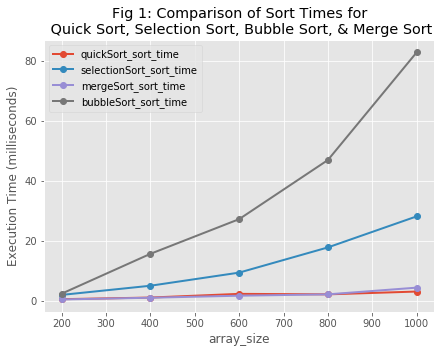

In [13]:
plt.style.use('ggplot')
plt.figure(figsize = (7,5))
plt.plot( 'array_size', 'quickSort_sort_time', data=df, marker='o',linewidth=2,linestyle='solid')
plt.plot( 'array_size', 'selectionSort_sort_time', data=df, marker='o',linewidth=2,linestyle='solid')
plt.plot( 'array_size', 'mergeSort_sort_time', data=df, marker='o',linewidth=2,linestyle='solid')
plt.plot( 'array_size', 'bubbleSort_sort_time', data=df, marker='o',linewidth=2,linestyle='solid')
plt.xlabel('array_size')
plt.ylabel('Execution Time (milliseconds)')
plt.title('Fig 1: Comparison of Sort Times for\n Quick Sort, Selection Sort, Bubble Sort, & Merge Sort')
plt.legend()
plt.show()
plt.close()

In Figure 1, we can see that for each of the algorithms, overall, as the array size increases, so does the sort execution time. This difference is barely noticeable for quicksort and merge sort, but very visible for selection sort and bubble sort. We can also see that bubble sort is by far the slowest algorithm of the group. Selection sort is slower than quick sort and merge sort, as expected. Since quick sort and merge sort are so close together on the graph, in Figure 2, we will exclude bubble sort to get a closer look at quick sort and merge sort. 

In [ ]:
plt.style.use('ggplot')
# plt.figure(figsize = (7,5))
plt.plot( 'month', 'cases', data=df4, marker='o',linewidth=2,linestyle='solid')
plt.plot( 'month', 'tweet_counts', data=df4, marker='o',linewidth=2,linestyle='solid')
# plt.plot( 'array_size', 'mergeSort_sort_time', data=df4, marker='o',linewidth=2,linestyle='solid')
plt.xlabel('month')
plt.ylabel('counts')
# plt.title('Fig 2: Comparison of Sort Times for\n Quick Sort, Selection Sort, & Merge Sort')
plt.legend()
plt.show()
plt.close()

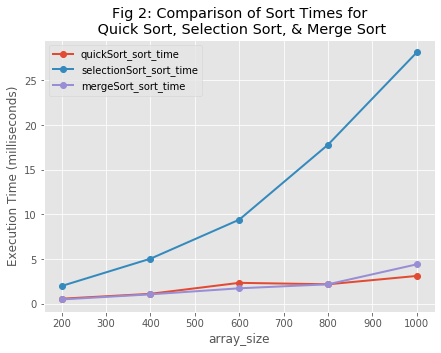

In [14]:
plt.style.use('ggplot')
plt.figure(figsize = (7,5))
plt.plot( 'array_size', 'quickSort_sort_time', data=df, marker='o',linewidth=2,linestyle='solid')
plt.plot( 'array_size', 'selectionSort_sort_time', data=df, marker='o',linewidth=2,linestyle='solid')
plt.plot( 'array_size', 'mergeSort_sort_time', data=df, marker='o',linewidth=2,linestyle='solid')
plt.xlabel('array_size')
plt.ylabel('Execution Time (milliseconds)')
plt.title('Fig 2: Comparison of Sort Times for\n Quick Sort, Selection Sort, & Merge Sort')
plt.legend()
plt.show()
plt.close()

In Figure 2, we see that quick sort and merge sort are very close together in terms of their execution time, and for the largest array, quick sort is slightly faster than merge sort.

# Executive Summary

In this assignment, we implemented four different sorting algorithms and compared how each algorithm scales with list size, as well as how the algorithms compare relative to each other. We first defined quick sort using code from the textbook, and implemented it on our original list of lists (array_list). We used a for loop and iteratively looped through array_list to obtain our resulting SORTED list of lists, and the sort execution times for quick sort. In preparing to sort using different algorithms, we made copies of the original list of lists. Next, we defined our other sorting algorithms (bubble sort, merge sort, and selection sort). Just as we did for quick sort, we iteratively looped through our copies of the original list of lists, and implemented the remaining sorting algorithms and obtained execution times for each. We then organized the array sizes and the associated execution times for each algorithm in a pandas DataFrame. And lastly, we generated graphs, comparing array size and execution time for all algorithms.

Quick sort is a sorting algorithm that uses the divide and conquer (D&C) technique of breaking a problem down into smaller and smaller pieces. In the worst case, quicksort takes O(n^2) time (SLOW), but in the average case, quick sort takes O(n log n) time. Merge sort, however, ALWAYS takes O(n log n) time. In the worst case, quicksort has O(n) levels and each level takes O(n) time, so O(n) X O(n) = O(n^2). In the best case, however, it has O(log n) levels, so the algorithm takes O(n) X O(log n) = O(n log n) time. If the pivot is always random, quicksort will complete in O(n log n) time on average. Also, quicksort has a smaller constant (c X n) than merge sort, so even though they both have O(n log n) time, quicksort is faster, and in practice quicksort hits the average case more frequently than the worst case, which makes it a better choice than merge sort. This is not very clear from our results, possibly because of something in the data, or even something related to the machine that's running the algorithms. Selection sort always takes O(n^2) time, and bubble sort takes O(n^2) time on average, but we can see in Figure 1 that in implementation, bubble sort is much slower than selection sort, so bubble sort likely has a large constant (c X n). When choosing an algorithm, it's important to note that Big O time is not the only factor that will affect the implementation; we have to consider the coefficient in front of the n for algorithms that have the same Big O, and the data and the implementation environment will also impact run time. 
